In [5]:
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import ripser
import persim
import importlib

import tdadiag_vec as td


In [6]:
X = np.loadtxt("../R/unitCircle.csv", skiprows=1, delimiter=",")
TD = td.tdadiag_vect(X, threshold=2, inf = 2)
diag = TD.calcDiag()

In [7]:
test_dict = {"ps":TD.computePS, "nl":TD.computeNL, 
             "vab":TD.computeVAB, "ecc":TD.computeECC}
def compareResults(R_prefix = None):
    if R_prefix is not None:
        print(f"Comparing compute{R_prefix.upper()}:")
        func = test_dict[R_prefix]
        for d in range(2):
            pyth = func(homDim = d)
            R = np.loadtxt(f"../R/{R_prefix}_{d}.csv", skiprows=1)
            cond = np.allclose(pyth, R)
            print(f"\t dim={d}: {cond}")
            assert cond
    else:
        for pr in test_dict.keys():
            compareResults(pr)
compareResults()

Comparing computePS:
	 dim=0: True
	 dim=1: True
Comparing computeNL:
	 dim=0: True
	 dim=1: True
Comparing computeVAB:
	 dim=0: True
	 dim=1: True
Comparing computeECC:
	 dim=0: True
	 dim=1: True


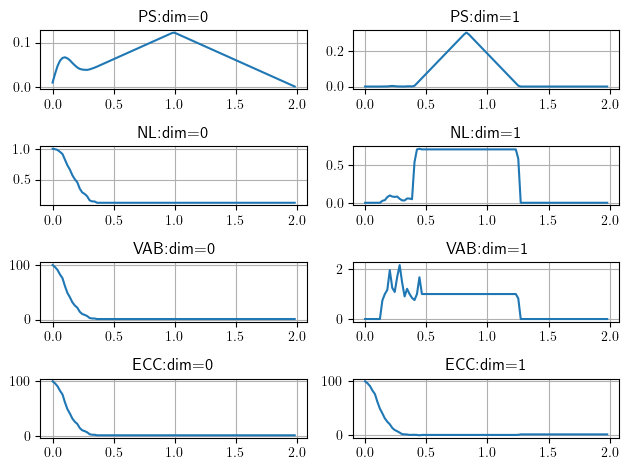

In [8]:
i = 1
for k in test_dict.keys():
    for d in range(2):
        func = test_dict[k]
        xx = func(homDim = d, nGrid = 100)
        ax = plt.subplot(len(test_dict.keys()),2,i)
        ax.plot(TD.scale[:-1], xx)
        ax.set_title(f"{k.upper()}:dim={d}")
        ax.grid(True)   
        i += 1
plt.tight_layout()


In [11]:

PD = TD.getPD()
x = PD[0][:,0]
y = PD[0][:,1]
#
ySeqH0 = np.quantile(PD[0][:,1], np.arange(0, 1.1, 0.2))
vpb0 = TD.computeVPB(homDim = 0, ySeq=ySeqH0)
R0 = np.loadtxt("../R/vpb_0.csv", skiprows=1)
print("dim = 0", np.allclose(vpb0, R0))


x = PD[1][:,0]
y = PD[1][:,1]
xSeqH1 = np.quantile(x, np.arange(0, 1.1, 0.2))
ySeqH1 = np.quantile(y, np.arange(0, 1.1, 0.2))
vpb1 = TD.computeVPB(homDim=1, xSeq = xSeqH1, ySeq=ySeqH1, flatten=True)
R1 = np.loadtxt("../R/vpb_1.csv", skiprows=1)
print("dim = 1", np.allclose(vpb1, R1, rtol=1e-4))

dim = 0 True
dim = 1 True


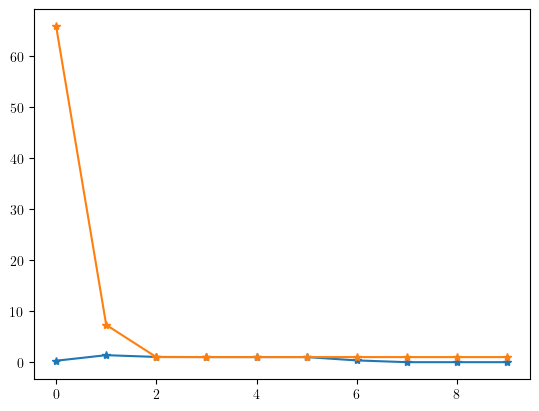

In [18]:
plt.plot(TD.computeVAB(homDim=1), "*-")
plt.plot(TD.computeVAB(homDim=0), "*-")